# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Haykal Maulana Rulian
- **Email:** themrhaykal@gmail.com
- **ID Dicoding:** kaltralala

## **Menentukan Pertanyaan Bisnis**

- Bagaimana pola pertumbuhan atau penurunan penjualan selama periode waktu yang spesifik?
- Bagaimana distribusi geografis pelanggan berdasarkan negara bagian, dan negara bagian mana yang memiliki konsentrasi pelanggan tertinggi?
- Berapa persen pesanan yang berhasil dikirimkan kepada pelanggan sebelum tanggal estimasi pengiriman yang dijanjikan?

## **Import Semua Packages/Library yang Digunakan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg

## **Data Wrangling**

### **Gathering Data**

**Memuat Tabel Customers**

In [ ]:
customers_df = pd.read_csv("/content/E-commerce-public-dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight**
- Jumlah customer dan distribusi geografis mereka (berdasarkan state).
- Informasi demografis customer, seperti kota.

**Memuat Tabel Geolocation**

In [ ]:
geolocation_df = pd.read_csv("/content/E-commerce-public-dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight**
- Memetakan lokasi customer dan seller untuk melihat persebaran geografis.
- Mengidentifikasi daerah dengan potensi pasar yang tinggi.

**Memuat Tabel Orders**

In [ ]:
orders_df = pd.read_csv("/content/E-commerce-public-dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight**
- Tren jumlah order dari waktu ke waktu.
- Status order (delivered, shipped, canceled) dan frekuensinya.

**Memuat Tabel Order Items**

In [ ]:
order_items_df = pd.read_csv("/content/E-commerce-public-dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight**
- Produk yang paling sering dibeli.
- Jumlah rata-rata item per order.

**Memuat Tabel Order Payments**

In [ ]:
order_payments_df = pd.read_csv("/content/E-commerce-public-dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight**
- Metode pembayaran yang paling populer dan trennya dari waktu ke waktu.
- Nilai transaksi rata-rata per metode pembayaran.


**Memuat Tabel Order Reviews**

In [ ]:
order_reviews_df = pd.read_csv("/content/E-commerce-public-dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight**
- Sentimen customer terhadap produk dan layanan (positif, negatif, netral).
- Distribusi skor review dan rata-rata skor review.

**Memuat Tabel Products**

In [ ]:
products_df = pd.read_csv("/content/E-commerce-public-dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight**
- Kategori produk yang paling populer dan yang paling tidak populer.
- Harga rata-rata produk per kategori.

**Memuat Tabel Product Category Name Translation**

In [ ]:
product_category_name_translation_df = pd.read_csv("/content/E-commerce-public-dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight**
- Memahami kategori produk yang berbeda dan terjemahannya untuk analisis yang lebih akurat.
- Mengidentifikasi kategori produk yang paling banyak diminati di berbagai bahasa.

**Memuat Tabel Sellers**

In [ ]:
sellers_df = pd.read_csv("/content/E-commerce-public-dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Jumlah seller dan distribusi geografis mereka.
- Performa seller berdasarkan jumlah penjualan atau rating.

### **Assessing Data**

**Menilai Data `customers_df`**

In [ ]:
customers_df.info()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


**Insight**
- Tipe data: Sudah sesuai.
- Missing value: Tidak ada missing value.
- Duplicate data: Tidak ada data duplikat.
- Inaccurate value: Tidak ada.

**Menilai Data `geolocation_df`**

In [ ]:
geolocation_df.info()
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


**Insight**
- Tipe data: Sudah sesuai.
- Missing value: Tidak ada.
- Duplicate data: Terdapat 261.831 data duplikat.
- Inaccurate value: Tidak ada

**Menilai Data `orders_df`**

In [ ]:
orders_df.info()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight**
- Tipe data:
 - Kolom `order_purchase_timestamp` dan `order_approved_at` perlu diubah menjadi tipe data datetime.
 - Kolom `order_delivered_carrier_date` ,`order_delivered_customer_date` dan `order_estimated_delivery_date` perlu diubah menjadi tipe data datetime.
- Missing value: Terdapat missing values pada kolom:
 - `order_approved_at`: 160
 - `order_delivered_carrier_date`: 1783
 - `order_delivered_customer_date`: 2965
- Duplicate data: Tidak ada data duplikat.
- Inaccurate value: Tidak ada.

**Menilai Data `order_items_df`**

In [ ]:
order_items_df.info()
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


**Insight**
- Tipe data: Sudah sesuai.
- Missing value: Tidak ada.
- Duplicate data: Tidak ada data duplikat.
- Inaccurate value: Tidak ada.

**Menilai Data `order_payments_df`**

In [ ]:
order_payments_df.info()
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


**Insight**
- Tipe data: Sudah sesuai.
- Missing value: Tidak ada.
- Duplicate data: Tidak ada data duplikat.
- Inaccurate value: Tidak ada.

**Menilai Data `order_reviews_df`**

In [ ]:
order_reviews_df.info()
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight**
- Tipe data:
 - Kolom `review_creation_date` dan `review_answer_timestamp` perlu diubah menjadi tipe data datetime.
- Missing value: Terdapat missing values pada kolom :
 - `review_comment_title`: 87.656
 - `review_comment_message`: 58.247
- Duplicate data: Tidak ada data duplikat.
- Inaccurate value: Tidak ada.

**Menilai Data `products_df`**

In [ ]:
products_df.info()
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight**
- Tipe data: Sudah sesuai.
- Missing value: Terdapat missing values pada kolom:
 - `product_category_name`: 610
 - `product_name_lenght`: 610
 - `product_description_lenght`: 610
 - `product_photos_qty`: 610
 - `product_weight_g`: 2
 - `product_length_cm`: 2
 - `product_height_cm`: 2
 - `product_width_cm`: 2
- Duplicate data: Tidak ada data duplikat.
- Inaccurate value: Tidak ada.

**Menilai Data `product_category_name_translation_df`**

In [ ]:
product_category_name_translation_df.info()
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


**Insight**
- Tipe data: Sudah sesuai.
- Missing value: Tidak ada.
- Duplicate data: Tidak ada data duplikat.
- Inaccurate value: Tidak ada.

**Menilai Data `sellers_df`**

In [ ]:
sellers_df.info()
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


**Insight:**
- Tipe data: Sudah sesuai.
- Missing value: Tidak ada.
- Duplicate data: Tidak ada data duplikat.
- Inaccurate value: Tidak ada.

### **Cleaning Data**

In [ ]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df_clean = orders_df.dropna(subset=['order_delivered_customer_date'])
orders_df_clean.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,1
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df_clean = orders_df_clean.dropna(subset=['order_approved_at'])
orders_df_clean = orders_df_clean.dropna(subset=['order_delivered_carrier_date'])
orders_df_clean.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df_clean['delivered_on_time'] = np.where(orders_df_clean['order_delivered_customer_date'] < orders_df_clean['order_estimated_delivery_date'], 'On Time', 'Late')
orders_df_clean.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
56501,801ce4e79b26aa1738dc18b0d1edef5d,ac73414c944aacef8ccaafda15771220,delivered,2017-03-14 14:08:29,2017-03-14 14:08:29,2017-03-17 06:45:37,2017-03-21 15:58:30,2017-04-05,On Time
78625,a26bdfa860437e3b9199a81b6003d928,863e3a165607322347d4d4d2f051d519,delivered,2018-07-31 07:37:42,2018-07-31 07:50:12,2018-07-31 16:26:00,2018-08-07 21:04:31,2018-08-14,On Time
71869,1932f20df9b3883e48068ecd03e6178f,d4afe26e05e0272f48a9194977473439,delivered,2018-02-17 23:50:41,2018-02-18 00:07:53,2018-02-20 18:47:07,2018-03-16 20:42:19,2018-03-15,Late
4278,84705956de681a2d1420bd90d7667472,bafd51862cb88bd42d499170c2ac35fd,delivered,2017-01-31 14:38:27,2017-01-31 15:20:16,2017-02-01 10:04:57,2017-02-07 16:31:33,2017-03-07,On Time
500,3c3fa8869e142a240f57aef59c095f6c,d1c40bfb050a09047a4c4426fe9a2893,delivered,2018-05-10 16:04:42,2018-05-11 03:50:29,2018-05-17 14:56:00,2018-05-21 23:56:39,2018-05-29,On Time


In [ ]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [ ]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [ ]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [ ]:
order_reviews_df.fillna(value="no comment", inplace=True)

In [ ]:
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [ ]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [ ]:
orders_df.info()
order_items_df.info()
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype     

## Exploratory Data Analysis (EDA)

### **Explore Data Customers**

In [ ]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
13161,0300bfbf1ddf99a37c01bd52639e40d6,de82de596de00f1b35a21443dc496c23,35277,sao joao do manteninha,MG
38469,b3d9a7a1e8ad667ffc19133a44b58213,3e544080d5c6dddc9c12925be95c1164,13225,varzea paulista,SP
52367,0462be0a9892418817ec41fd7c39a57b,db70a8a87fd3ae2ec9b0d9e9daada859,37650,camanducaia,MG
25507,c9eb51d4c73a71b76a9b1131ce6e5828,8400f003706b8a106fd7e2b1a7b8d77e,28895,rio das ostras,RJ
80059,5067d126bcdf8822347ae96bd0cf8a97,b7b162291adff744d6f3c6450557ffee,88430,petrolandia,SC


In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### **Explore Data Orders**

In [ ]:
orders_df_clean.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
32335,9b2a9d4d3efb4ad2318f65b28a776175,d8e42482d0eda51e849d77e79d749534,delivered,2018-05-21 17:01:26,2018-05-21 17:56:16,2018-05-22 10:31:00,2018-06-05 18:42:53,2018-06-13,On Time
67465,892336b9ce0d1f033165460c45e1048e,3f118d3879be515060d11c8f6c2318b1,delivered,2018-05-06 23:04:37,2018-05-08 19:35:14,2018-05-10 16:21:00,2018-05-14 23:32:45,2018-06-01,On Time
60478,ce943243f0c85ae46078241f00eb17ac,b603ceee2b1a9b3303751d048030bcf3,delivered,2017-10-23 14:15:32,2017-10-23 14:35:30,2017-10-25 16:47:39,2017-11-02 13:51:34,2017-11-23,On Time
54453,a6b1ef6078eba08fce9fdc3263d690c1,8912c3b927be99f1f80b81354883114c,delivered,2017-10-21 14:31:35,2017-10-21 14:49:40,2017-10-24 18:58:50,2017-11-08 18:04:19,2017-11-14,On Time
14224,c577af5e9d5dbecf0ac65ff28cb8ad45,4877c8bc9b7438703b2e63ee5396335e,delivered,2018-08-09 20:25:54,2018-08-10 20:25:11,2018-08-14 15:54:00,2018-08-22 17:09:03,2018-09-05,On Time


In [ ]:
orders_df_clean['delivered_on_time'].describe()

,delivered_on_time
count,96461
unique,2
top,On Time
freq,88635


In [ ]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
540161,29830,-18.707773,-40.399318,nova venecia,ES
590019,35338,-19.628331,-42.106809,ubaporanga,MG
409638,20270,-22.914791,-43.222494,rio de janeiro,RJ
822822,78250,-15.235695,-59.334738,pontes e lacerda,MT
662888,39560,-16.165947,-42.299587,salinas,MG


In [ ]:
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


In [ ]:
customers_orders_df = pd.merge(
    left=orders_df_clean,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,On Time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,On Time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
customers_orders_df.shape[0]

96461

In [ ]:
all_df = pd.merge(
    left=customers_orders_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
all_df = all_df.drop_duplicates(subset=['customer_id'])
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
16,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA
30,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO
55,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,On Time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN
72,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,On Time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9195.0,-23.675037,-46.524784,santo andre,SP


In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola pertumbuhan atau penurunan penjualan selama periode waktu yang spesifik?

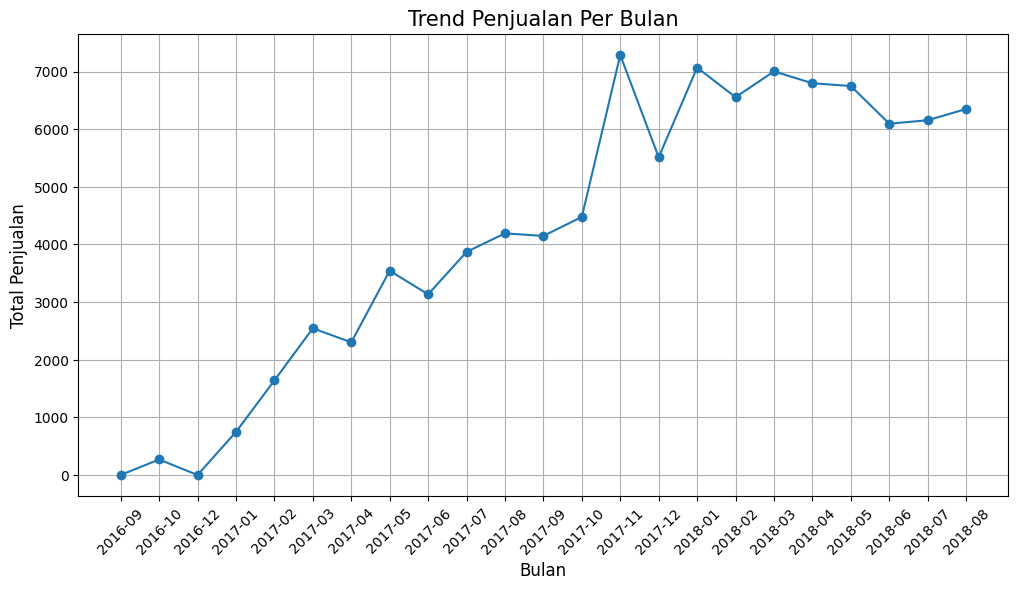

In [ ]:
fixed_df['order_month'] = fixed_df['order_purchase_timestamp'].dt.to_period('M')
monthly_order = fixed_df.groupby('order_month')['order_id'].nunique()
plt.figure(figsize=(12, 6))
plt.plot(monthly_order.index.astype(str), monthly_order.values, marker='o')
plt.title('Trend Penjualan Per Bulan', fontsize=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana distribusi geografis pelanggan berdasarkan negara bagian, dan negara bagian mana yang memiliki konsentrasi pelanggan tertinggi?

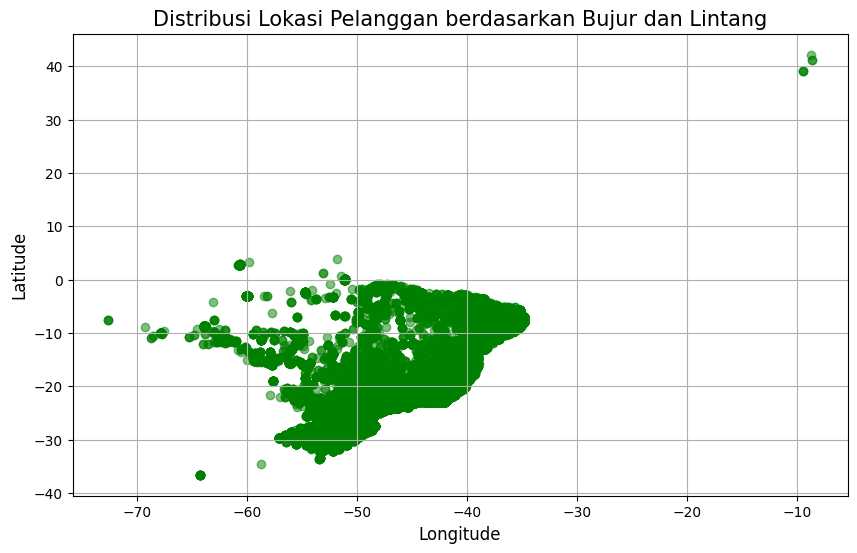

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(fixed_df['geolocation_lng'], fixed_df['geolocation_lat'], marker='o', c='green', alpha=0.5)
plt.title('Distribusi Lokasi Pelanggan berdasarkan Bujur dan Lintang', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-71-f56502a3c109>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

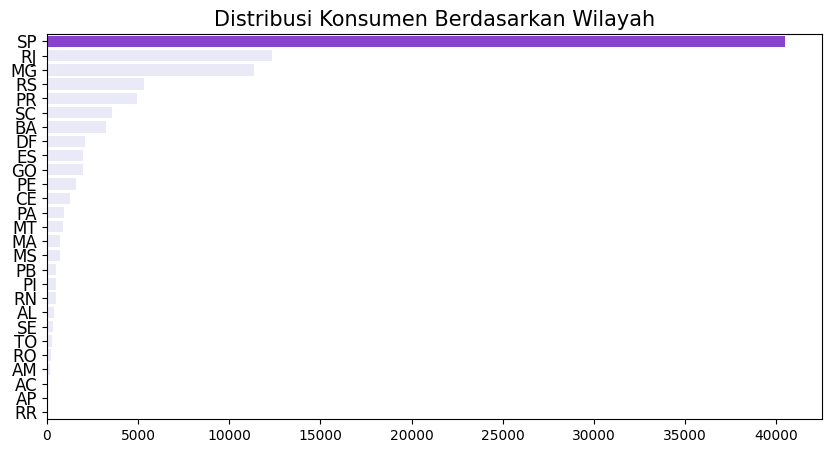

In [ ]:
bystate_df = fixed_df.groupby(by="customer_state")['customer_id'].nunique().reset_index()
bystate_df.rename(columns={
    "customer_id":"customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#E6E6FA"] * len(bystate_df)
colors_[0] = "#8A2BE2"
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Distribusi Konsumen Berdasarkan Wilayah", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 3: Berapa persen pesanan yang berhasil dikirimkan kepada pelanggan sebelum tanggal estimasi pengiriman yang dijanjikan?

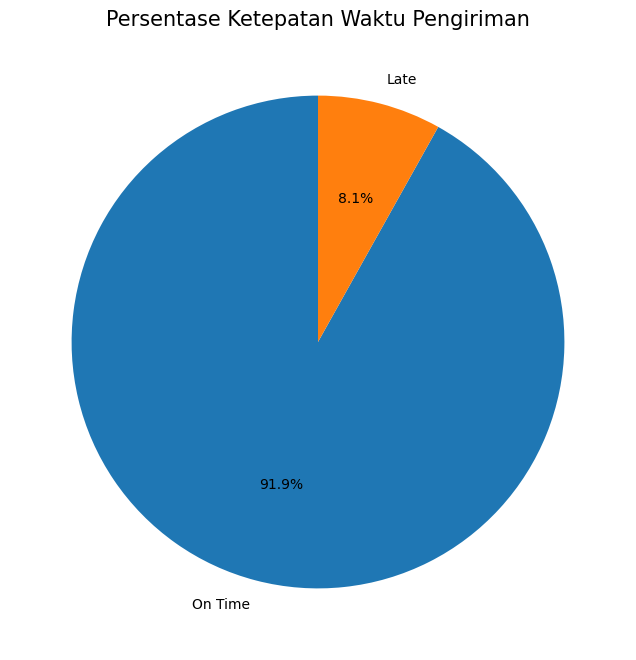

In [ ]:
on_time_counts = fixed_df['delivered_on_time'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(on_time_counts, labels=on_time_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Ketepatan Waktu Pengiriman', fontsize=15)
plt.show()

## Conclusion

1. Visualisasi tren penjualan bulanan mengindikasikan arah positif, dengan kurva yang menanjak dari kiri bawah ke kanan atas. Ini mencerminkan peningkatan substansial dalam total penjualan selama periode yang diamati.
2. Analisis distribusi geografis pelanggan memperlihatkan konsentrasi yang signifikan pada satu area, tepatnya antara garis bujur -60 hingga -40 dan garis lintang -30 hingga -10. Wilayah yang berada dalam rentang koordinat ini diidentifikasi sebagai SP, yang merujuk pada negara bagian São Paulo.
3. Evaluasi kinerja pengiriman menunjukkan hasil yang menggembirakan. Dengan membandingkan jumlah pesanan yang tiba tepat waktu terhadap total pesanan, ditemukan bahwa 91,9% pengiriman berhasil mencapai pelanggan sesuai atau lebih cepat dari estimasi waktu yang dijanjikan.